In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt 
import scipy.stats as stt

In [48]:
config_no = 1
take_no = 1
ax_no = 'red'
tmp_data = np.load(f"../data/norm_mode_null_test/NullTest_config{config_no}-{ax_no}-take{take_no}.npy")

In [54]:
hit_ind = np.argmax(np.abs(tmp_data[:, 1]))
cut_seg = 300
valid_seg = 1200
start = hit_ind + cut_seg
end = start + valid_seg
selected_seg = tmp_data[start:end]

In [55]:
test_data = selected_seg[:, 1]
const_split = np.split(selected_seg, np.where(np.diff(test_data) != 0)[0] + 1)
clean_seg = np.concatenate([tmp[:1] for tmp in const_split], axis=0)

In [56]:
def model(params, t):
    amp, freq, phase, offset, tau = params
    return amp * np.sin(freq * 2 * np.pi * t + phase) * np.exp(-t / tau) + offset

def cost(params, t, y):
    return ((model(params, t) - y)**2).sum()

In [57]:
t = clean_seg[:, 0]
y = clean_seg[:, 1]
res = opt.minimize(cost, (1, 10, 0, -50, 0.5), (t, y))

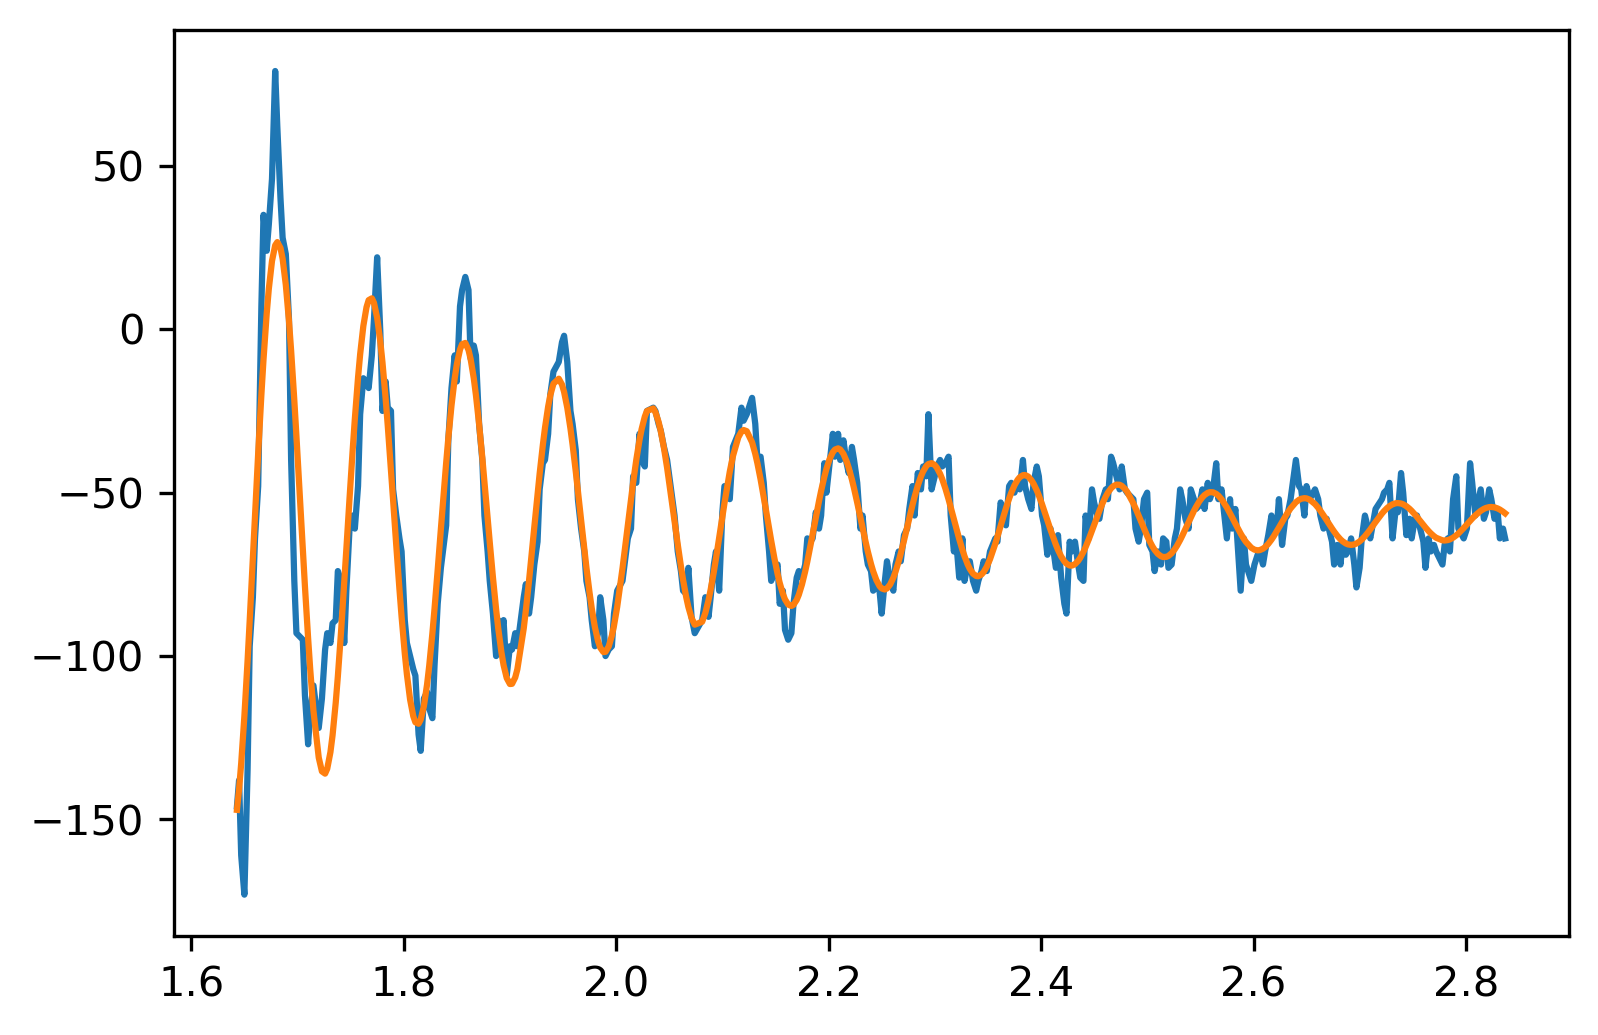

In [58]:
plt.figure(dpi=300)
plt.plot(t, y)
plt.plot(t, model(res.x, t))

In [59]:
res.x

array([ 5.89996089e+03,  1.13771399e+01, -1.80996347e+01, -5.92340642e+01,
        3.97499615e-01])